In [ ]:
'''
========================================
Nama: Ignatius Kurniawan Eko Wibowo
Batch: RMT 032

Program ini dibuat dengan bertujuan membantu proses
analisa data vaksin Covid-19
========================================
'''

Referensi Data: https://www.kaggle.com/datasets/gpreda/covid-world-vaccination-progress

Tableau Public URL: https://public.tableau.com/app/profile/ignatius.kurniawan.eko.wibowo/viz/AseanCovidVaccination/Dashboard1?publish=yes

Sebagai seorang data analyst yang bekerja di WHO, saya mendapatkan tugas untuk menganalisa data vaksin Covid-19 di 10 negara Asean dalam kurun waktu 2021-2022. Untuk dapat menjalankan tugas dengan lebih mudah, saya memutuskan untuk menggunakan SMART framework untuk mengidentifikasi adanya masalah dalam penyebaran vaksin Covid-19 tersebut

# SMART Framework

**Specific**
<br>
Menganalisa apakah rata-rata penduduk negara Asean sudah mendapatkan vaksinasi Covid-19

**Measurable**
<br>
Ada peningkatan setidaknya 50% dari total orang yang sudah mendapatkan vaksinasi Covid-19 terhitung dari awal tahun 2020

**Achievable**
<br>
By the end of 2022 diharapkan total orang di negara Asean yang sudah vaksin Covid-19 ada di angka 90% dari total populasi

**Relevant**
<br>
Pemerataan pemberian vaksin Covid-19 bagi orang-orang di negara Asean diharapkan dapat menurunkan jumlah kematian yang disebabkan oleh Covid-19

**Time-bound**
<br>
Goal ini dirancang untuk dapat dipenuhi dalam jangka waktu 2 tahun, yakni dari 2020 sampai 2022

Penjabaran masalah menggunakan 5W+1H

1. Vaksin apa yang paling banyak digunakan di negara-negara Asean?
2. Negara Asean mana yang memberikan vaksin terbanyak per harinya?
3. Negara Asean mana yang memiliki vaccination rate tertinggi?
4. Bagaimana trend pemberian vaksin di negara-negara Asean? Apakah semakin lama, semakin banyak orang yang mendapatkan vaksin?
5. Berapa rata-rata jumlah orang yang sudah divaksin setiap harinya di Asean?
6. Apakah ada asosiasi antara jenis vaksin yang diberikan dengan bulan pemberiannya?


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [3]:
df = pd.read_csv('country_vaccinations.csv')

In [4]:
df.head(5)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [5]:
df.shape

(86512, 15)

In [6]:
df.columns.to_list()

['country',
 'iso_code',
 'date',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'daily_vaccinations_raw',
 'daily_vaccinations',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'daily_vaccinations_per_million',
 'vaccines',
 'source_name',
 'source_website']

In [7]:
# Cek apakah dtype sudah sesuai
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

In [8]:
# Cek berapa banyak data yang memiliki null value
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [10]:
# Filtering negara Asia Tenggara
asean = [
        'Brunei',
        'Cambodia',
        'Indonesia',
        'Laos',
        'Malaysia',
        'Myanmar',
        'Philippines',
        'Singapore',
        'Thailand',
        'Vietnam'
         ]

asean_countries = df.loc[(df['country'].isin(asean))]

In [11]:
asean_countries.shape

(4033, 15)

In [18]:
asean_countries.to_csv('asean_covid.csv', index=False)

In [19]:
asean_countries

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,vaccine_names
11395,Brunei,BRN,2021-04-02,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",World Health Organization,https://covid19.who.int/,None
11396,Brunei,BRN,2021-04-03,754.0,754.0,NaN,754.0,754.0,0.17,0.17,NaN,1708.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",World Health Organization,https://covid19.who.int/,None
11397,Brunei,BRN,2021-04-04,822.0,822.0,NaN,68.0,411.0,0.19,0.19,NaN,931.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",World Health Organization,https://covid19.who.int/,None
11398,Brunei,BRN,2021-04-05,1214.0,1214.0,NaN,392.0,405.0,0.27,0.27,NaN,917.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",World Health Organization,https://covid19.who.int/,None
11399,Brunei,BRN,2021-04-06,2560.0,2560.0,NaN,1346.0,640.0,0.58,0.58,NaN,1449.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",World Health Organization,https://covid19.who.int/,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Novavax
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sputnik Light
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sputnik V
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CanSino


In [33]:
# memastikan semua negara Asean sudah masuk dalam dataset
asean_countries.country.nunique()

10

In [35]:
# mengeluarkan jenis-jenis vaksin dan memasukkannya ke dalam set
asean_countries.reset_index(inplace=True, drop=True)
vaccines = set()
for n in range(len(asean_countries)):
    vaccines.update(asean_countries['vaccines'][n].split(', '))
    
vaccines

{'Abdala',
 'CanSino',
 'Johnson&Johnson',
 'Moderna',
 'Novavax',
 'Oxford/AstraZeneca',
 'Pfizer/BioNTech',
 'Sinopharm/Beijing',
 'Sinovac',
 'Sputnik Light',
 'Sputnik V'}

In [14]:
# menghilangkan data duplikat
vaksin_negara = asean_countries[['country', 'vaccines']].drop_duplicates()

mapping_negara = {}

for index, row in vaksin_negara.iterrows():
    vaccines = row['vaccines'].split(', ')
    for vaccine in vaccines:
        if vaccine in mapping_negara:
            mapping_negara[vaccine].append(row['country'])
        else:
            mapping_negara[vaccine] = []
            mapping_negara[vaccine] = [row['country']]

In [42]:
for i in range(len(mapping_negara)):
    print(list(mapping_negara.keys())[i],':',mapping_negara[list(mapping_negara.keys())[i]])

Johnson&Johnson : ['Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Philippines']
Moderna : ['Brunei', 'Indonesia', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']
Oxford/AstraZeneca : ['Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Thailand', 'Vietnam']
Pfizer/BioNTech : ['Brunei', 'Indonesia', 'Laos', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']
Sinopharm/Beijing : ['Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']
Sinovac : ['Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Philippines', 'Singapore', 'Thailand']
Novavax : ['Indonesia']
Sputnik Light : ['Laos', 'Philippines']
Sputnik V : ['Laos', 'Philippines', 'Vietnam']
CanSino : ['Malaysia']
Abdala : ['Vietnam']


In [15]:
asean_countries['vaccine_names'] = None

for i, key in enumerate(mapping_negara.keys()):
    asean_countries.loc[i, 'vaccine_names'] = key


C:\Users\YOGA\AppData\Local\Temp\ipykernel_10644\2397939341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asean_countries['vaccine_names'] = None
C:\Users\YOGA\AppData\Local\Temp\ipykernel_10644\2397939341.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asean_countries.loc[i, 'vaccine_names'] = key


In [17]:
asean_countries['vaccine_names'].unique()

array([None, 'Johnson&Johnson', 'Moderna', 'Oxford/AstraZeneca',
       'Pfizer/BioNTech', 'Sinopharm/Beijing', 'Sinovac', 'Novavax',
       'Sputnik Light', 'Sputnik V', 'CanSino', 'Abdala'], dtype=object)

In [ ]:
vaksin_covid

In [24]:
vaccine_names = list(mapping_negara.keys())

# memecah list country
all_countries = [country for value in mapping_negara.values() for country in value]


vaccine_country = pd.DataFrame({'Vaccine Name': vaccine_names, 'Country': all_countries[:len(vaccine_names)]})
vaccine_country.to_csv('vaccine_country.csv', index=False)

In [ ]:
vaccine_names = list(mapping_negara.keys())
vaccine_counts = [len(v) for v in mapping_negara.values()]
countries = list(mapping_negara.values())

vaksin = pd.DataFrame({'Vaccine Name': vaccine_names, 'Number of Countries': vaccine_counts, 'Countries': countries})

c:\Users\YOGA\anaconda3\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


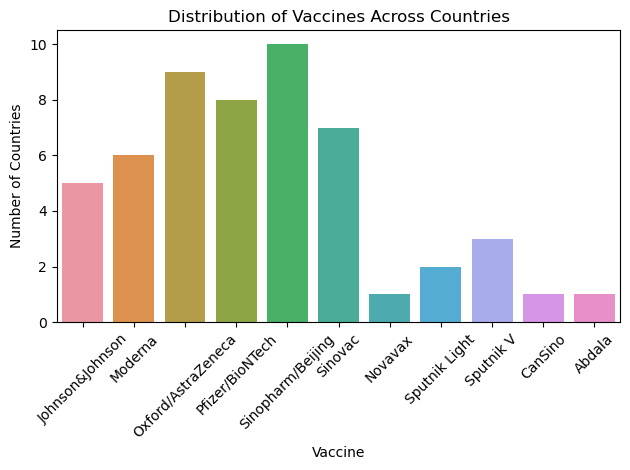

In [20]:
# ambil vaccine name
vaccine_names = list(mapping_negara.keys())

# Menghitung total negara untuk setiap vaksinnya
vaccine_counts = [len(v) for v in mapping_negara.values()]

# membuat bar chart
sns.barplot(x=vaccine_names, y=vaccine_counts)
plt.xlabel('Vaccine')
plt.ylabel('Number of Countries')
plt.title('Distribution of Vaccines Across Countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**dari visual di atas, dapat diketahui bahwa vaksin Pfizer/BioNTech adalah vaksin yang paling banyak digunakan di negara-negara Asean**
<br>
**dan vaksin Novavax adalah vaksin yang paling <emp>sedikit</emp> digunakan di negara-negara Asean.**

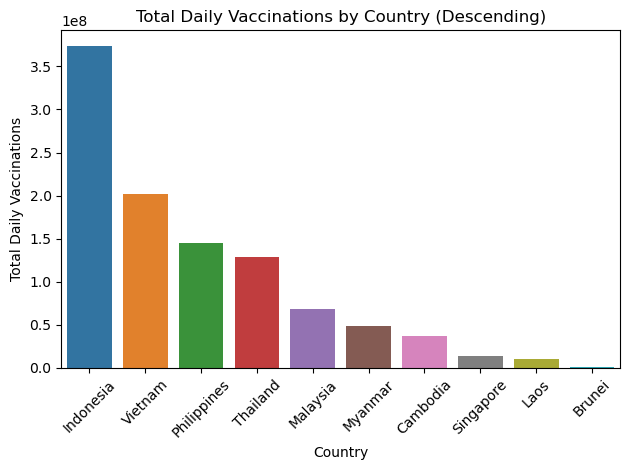

In [48]:
data = (asean_countries.groupby('country')['daily_vaccinations'].sum().reset_index().sort_values(by='daily_vaccinations', ascending=False))

sns.barplot(x='country', y='daily_vaccinations', data=data)
plt.xlabel('Country')
plt.ylabel('Total Daily Vaccinations')
plt.title('Total Daily Vaccinations by Country (Descending)')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

**Melaui visual di atas, Indonesia merupakan negara Asean yang memberikan vaksinasi ke warganya paling banyak dan Brunei merupakan negara yang memberikan vaksinasi ke warganya paling sedikit dibandingkan dengan negara-negara Asean lainnya**

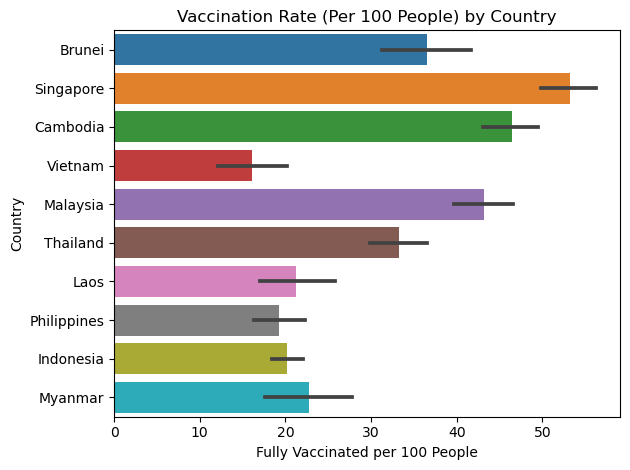

In [55]:
vaksinasi_per_100 = asean_countries.sort_values(by='people_fully_vaccinated_per_hundred', ascending=False)


sns.barplot(x='people_fully_vaccinated_per_hundred', y='country', orient='h', data=vaksinasi_per_100)


plt.ylabel('Country')
plt.xlabel('Fully Vaccinated per 100 People')
plt.title('Vaccination Rate (Per 100 People) by Country')
plt.tight_layout()
plt.show()

**Melalui visualisasi di atas, dapat diketahui, meskipun Indonesia memiliki jumlah warga yang paling banyak mendapat vaksin, namun jika dihitung banyaknya orang yang divaksinasi per 100 orang, Singapura memiliki jumlah yang lebih tinggi. Hal ini berarti jumlah persentase warga yang sudah di vaksin di Singapura lebih tinggi daripada Indonesia.**

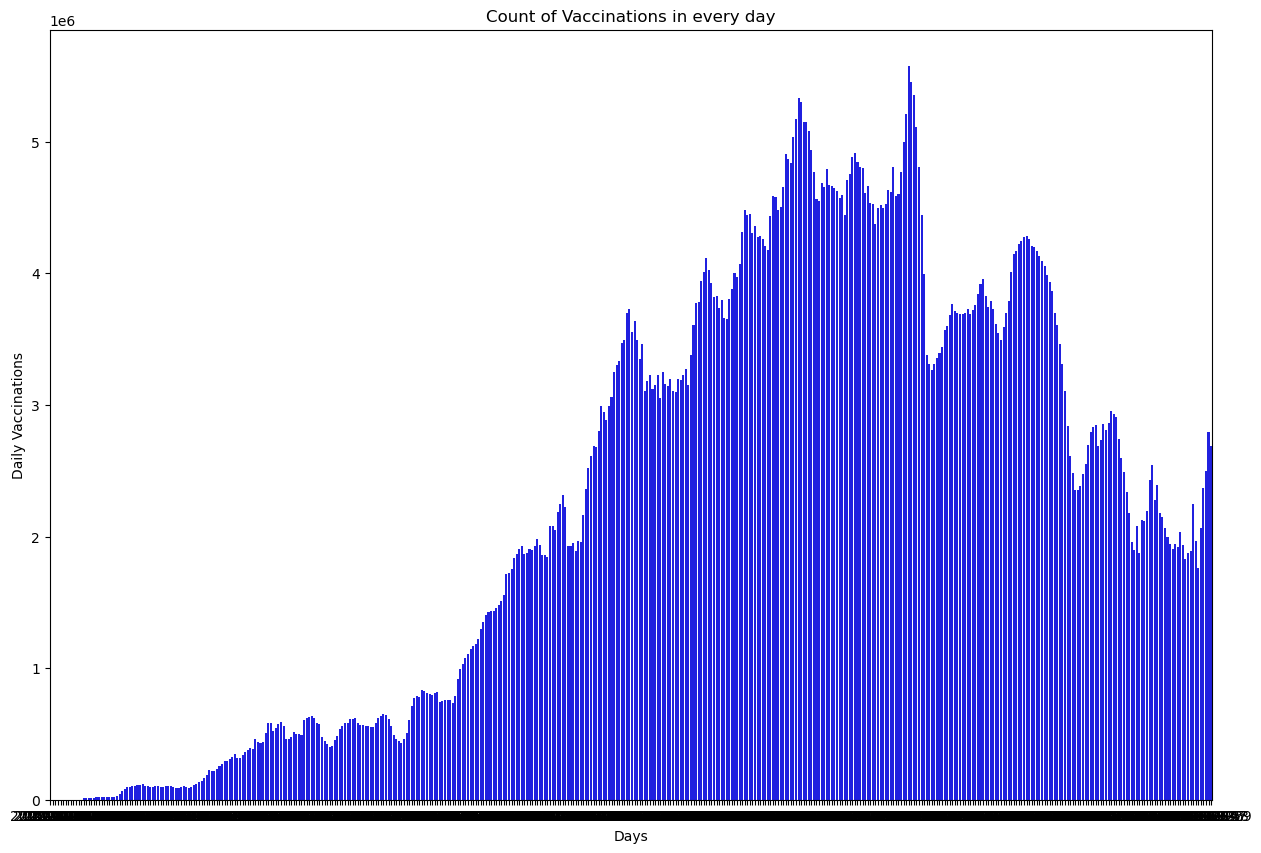

In [75]:
daily_vaccinations = asean_countries.groupby('date')['daily_vaccinations'].sum().reset_index()
figure = plt.figure(figsize=(15,10))
sns.barplot(y=daily_vaccinations.daily_vaccinations, x=daily_vaccinations.date, color="blue")
plt.xticks()
plt.xlim(xmin=0.8)
plt.xlabel('Days')
plt.ylabel('Daily Vaccinations')
plt.title('Count of Vaccinations in every day')
plt.show()

**Dari visualisasi di atas, dapat dilihat semakin ke sini, semakin banyak warga negara-negara Asean yang mendapatkan vaksin setiap harinya**

## Statistika Deskriptif

In [27]:
# Melihat rata-rata jumlah orang yang sudah divaksin setiap harinya dengan penghitungan central tendency
avg_indonesia = asean_countries[asean_countries['country'] == 'Indonesia']['daily_vaccinations'].mean()
avg = asean_countries['daily_vaccinations'].mean()

print(f"Rata-rata jumlah orang yang sudah divaksin setiap harinya: {avg:.2f}.")
print(f"Rata-rata jumlah orang Indonesia yang sudah divaksin setiap harinya: {avg_indonesia:.2f}.")

Rata-rata jumlah orang yang sudah divaksin setiap harinya: 255300.59.
Rata-rata jumlah orang Indonesia yang sudah divaksin setiap harinya: 846289.29.


**Rata-rata orang Indonesia yang sudah divaksin lebih tinggi daripada rata-rata jumlah orang yang divaksin tiap harinya di negara-negara Asean, hal ini mungkin terjadi karena jumlah penduduk Indonesia yang banyak**

## Statistika Inferensial

mana yang memiliki rate vaksinasi lebih tinggi Indonesia atau Singapura

H0: total vaksinasi per 100 Indonesia == total vaksinasi per 100 Singapura
H1: total vaksinasi per 100 Indonesia != total vaksinasi per 100 Singapura

In [83]:
# membagi datasets menjadi 2, Indonesia dan Singapura
IDN = asean_countries[asean_countries['country']=='Indonesia'][['date','total_vaccinations_per_hundred']].groupby(['date']).sum()
SIN = asean_countries[asean_countries['country']=='Singapore'][['date','total_vaccinations_per_hundred']].groupby(['date']).sum()

In [98]:
t_stat, p_val = stats.ttest_ind(IDN['total_vaccinations_per_hundred'], SIN['total_vaccinations_per_hundred'])
print('T-Statistic:',t_stat)
print('P-value:',p_val/2)

T-Statistic: -20.168045688132572
P-value: 3.799364352456635e-75


**Dari hasil penghitungan di atas, kita bisa menolak hipotesis null yang berarti ada perbedaan antara jumlah total vaksinasi per 100 di Indoneisa dan Singapura. Ada perbedaan yang sangat signifikan dari kedua dataset di atas, walaupun T-value yang negatif, itu tidak memberitahu Singapura atau Indonesia yang memiliki nilai lebih tinggi**

total vaksin Astra Zaneca vs Pfizer di Indonesia

In [109]:
# Extract data for Astra Zeneca vaccinations (assuming 'vaccines' contains 'AstraZeneca')
brunei_astrazeneca = asean_countries[asean_countries['vaccines'].str.contains('AstraZeneca') & (asean_countries['country'] == 'Brunei')]
indonesia_astrazeneca = asean_countries[asean_countries['vaccines'].str.contains('AstraZeneca') & (asean_countries['country'] == 'Indonesia')]

# Calculate means and standard deviations for Astra Zeneca usage
brunei_mean_astrazeneca = brunei_astrazeneca['total_vaccinations'].mean()
brunei_sd_astrazeneca = brunei_astrazeneca['total_vaccinations'].std()

indonesia_mean_astrazeneca = indonesia_astrazeneca['total_vaccinations'].mean()
indonesia_sd_astrazeneca = indonesia_astrazeneca['total_vaccinations'].std()

# Calculate Z-score
z_score = (brunei_mean_astrazeneca - indonesia_mean_astrazeneca) / np.sqrt(brunei_sd_astrazeneca**2 / len(brunei_astrazeneca) + indonesia_sd_astrazeneca**2 / len(indonesia_astrazeneca))

# Set significance level (alpha)
alpha = 0.05

# Calculate two-tailed p-value using scipy.stats.zscore
p_value = 1 - stats.norm.cdf(abs(z_score)) * 2

# Print results
print(f"Z-score: {z_score:.4f}")
print(f"p-value: {p_value:.4f}")

# Intepretasi hasil berdasarkan p-value
if p_value < alpha:
    print("Ada perbedaan jumlah penggunaan vaksin Astra Zeneca di Indonesia dan Brunei.")
else:
    print("Fail to reject null hypothesis. Not enough evidence to conclude a significant difference.")


Z-score: -21.6295
p-value: -1.0000
Ada perbedaan jumlah penggunaan vaksin Astra Zeneca di Indonesia dan Brunei.


In [110]:
from scipy.stats import chi2_contingency

df = asean_countries


# Grouping date menjadi month (e.g., monthly)
df['month'] = pd.to_datetime(df['date']).dt.month_name()

# membuat contigency table antara vaccines vs month
contingency_table = pd.crosstab(df['vaccines'], df['month'])

# Chi-square test
chi2_statistic, p_value, degrees_of_freedom, expected_counts = chi2_contingency(contingency_table.values)

# set significance level
alpha = 0.05

print(f"Chi-Square Statistic: {chi2_statistic:.2f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of Freedom: {degrees_of_freedom}")

# Interpret results
if p_value < alpha:
    print("Reject null hypothesis. Tidak ada asosiasi yang signifikan antara vaksin yang diberikan dan bulan pemberiannya.")
else:
    print("Fail to reject null hypothesis. Not enough evidence to conclude an association.")


Chi-Square Statistic: 78.30
p-value: 0.9382
Degrees of Freedom: 99
Fail to reject null hypothesis. Not enough evidence to conclude an association.


**p-value yang sebesar itu mengindikasikan tidak adanya bukti yang cukup untuk menyimpulkan adanya asosiasi antara bulan pemberian vaksin dan tipe vaksin yang diberikan.**

### Kesimpulan

1. Pfizer merupakan vaksin yang paling banyak digunakan di negara-negara Asean
2. Indonesia adalah negara dengan jumlah total pemberian vaksin terbanyak per harinya, hal ini mungkin disebabkan oleh populasi penduduk Indonesia yang besar
3. Singapura adalah negara Asean yang memiliki vaccination tertinggi
4. Total pemberian vaksin di negara-negara Asean mengalami trend naik lalu penurunan di akhir tahun 2022
5. Ada rata-rata 250,000-an orang yang divaksin setiap harinya di negara-negara Asean
6. Tipe vaksin yang diberikan sepanjang tahun 2021-2022 di negara-negara Asean tidak bisa diasosiasikan dengan waktu pemberian vaksin